In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [123]:
df = pd.read_csv('/Users/sameerkallurkar/PycharmProjects/ML_exec/mini project 2 (logistic regression)/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [124]:
df_numeric = df.select_dtypes(include=[np.number])
result = df.groupby('Purchased')[df_numeric.columns].mean()
result

,User ID,Age,AnnualSalary,Purchased
Purchased,,,,
0,496.734114,34.700669,62373.745819,0.0
1,506.101990,48.146766,88033.582090,1.0


<Axes: xlabel='Gender'>

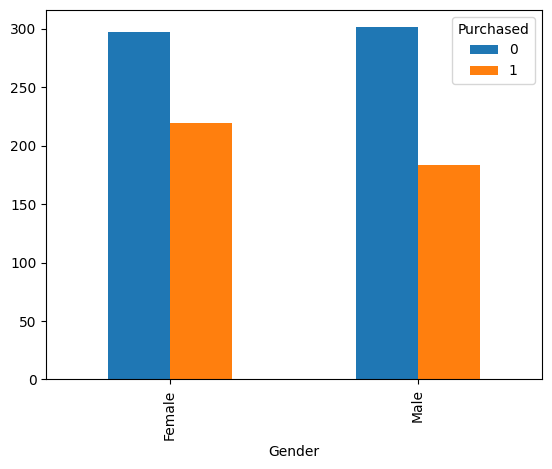

In [125]:
pd.crosstab(df['Gender'], df['Purchased']).plot(kind='bar')

In [126]:
x_first = df[['Age', 'AnnualSalary', 'Gender']]
y = df['Purchased']

In [127]:
gender_dummies = pd.get_dummies(df['Gender'], dtype=int)
x_inter = pd.concat([x_first, gender_dummies], axis='columns')
x_inter.head()
x = x_inter.drop(['Gender', 'Female'], axis='columns')
x.head()

,Age,AnnualSalary,Male
0,35,20000,1
1,40,43500,1
2,49,74000,1
3,40,107500,1
4,25,79000,1


In [128]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x , y, test_size=0.2)

In [129]:
model = linear_model.LogisticRegression()

In [130]:
model.fit(x_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
model.score(x_test, y_test)

0.83

In [132]:
y_predicts = model.predict(x_test)

In [133]:
cm = confusion_matrix(y_test, y_predicts)
cm

array([[111,   6],
       [ 28,  55]])

Text(50.722222222222214, 0.5, 'target')

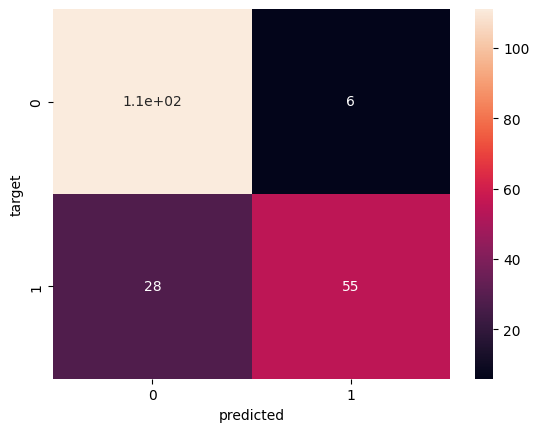

In [134]:
plt.figure()
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('target')